<font color="#279D9F"><h1 align="center">Máster en Big Data y Data Science</h1></font>
<font color="#6E6E6E"><h2 align="center">Práctica 2: Estadística</h2></font>
<font color="#000000"><h3 align="center">Autor: Guillermo García López</h3></font>

## 1) Distribución Weibull

## Tu turno 1: A) Respecto la distribución de Weibull, modificar el código para obtener una distribución de duración de vida de tasa de fallo positiva, constante o negativa mostrando las figuras de dichas distribuciones. B) Razonar y explicar como se ha realizado y se ha graficado la distribución de "Student" simulada, a partir de los códigos anteriores. Demostrar gráficamente como en el límite de los grados de libertad hacía infinito, la variable t de Student tiende a una normal. Calcular la media y varianza de la distribución t de Student, comprobando que en el límite de infinitos grados de libertad de la distribución estos valores son los esperados para la variable aleatoria t simulada.

<h5>Resolución:</h5>

<b>A)</b>

Sabemos que una distribución de duración de vida está bien representada por la exponencial en función de la tasa de fallo y su dependencia con la variable dependiente ('t' de tiempo, en estos casos). Así pues y si suponemos una tasa de fallo dependiente del tiempo como $\lambda$ = h$t^{c-1}$ (como en el caso de la distribución de Weibull) tendríamos lo siguiente:

In [2]:
# Importamos las librerías necesarias durante la práctica:
import numpy as np
from scipy import stats 
import pandas as pd 
%matplotlib inline 
import matplotlib.pyplot as plt 

In [3]:
# Creamos array con variable temporal
tmin, tmax = 1, 1000
t= np.linspace(tmin, tmax, tmax*100)

In [4]:
'''
Función que recibe parámetros (h, c) de la tasa de fallo y y plotea la distribución de vida en base los parámetros.

Input: valores h, c
Output: none (no hay retorno explícito de objeto, solo plotea)
'''
def plot_distr_vida(c, h=1):
    
    t= np.linspace(1, 1000, 100000)
    axisSize = titleSize = 14
    DistVida = (h*(t**(c-1))) * np.exp( - (h/c)*(t**c))
    plt.xlabel('t', size=axisSize), plt.ylabel('f(t)', size=axisSize)
    if c < 1.:
        plt.title('Distribución de vida con tasa de fallo decreciente según t \n \
                   Parámetros: h={0}, c={1}'.format(h, c), size=titleSize)
    elif c == 1.0:
        plt.title('Distribución de vida con tasa de fallo constante según t \n \
                   Parámetros: h={0}, c={1}'.format(h, c), size=titleSize)
    else:
        plt.title('Distribución de vida con tasa de fallo creciente según t \n \
                   Parámetros: h={0}, c={1}'.format(h, c), size=titleSize)
    
    plt.plot(t[0:1000], DistVida[0:1000], linewidth=1.5, color='k')

Y finalmente representamos las figuras:

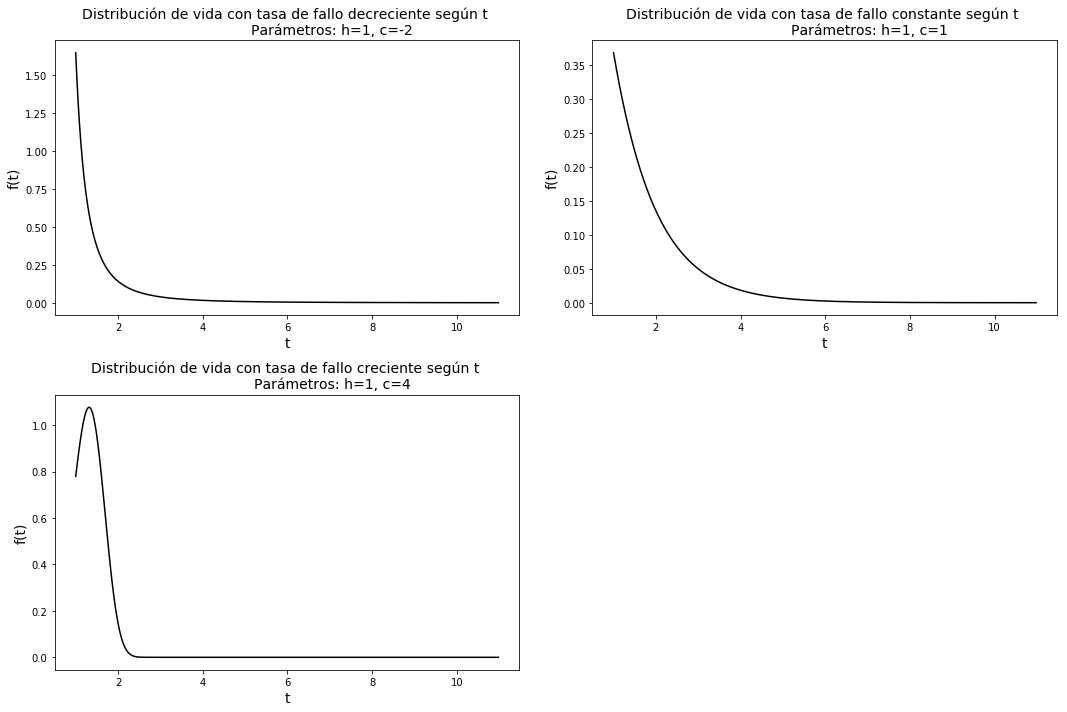

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1);
plot_distr_vida(-2)
plt.subplot (2, 2, 2);
plot_distr_vida(1)
plt.subplot(2, 2, 3);
plot_distr_vida(4)

plt.tight_layout()

<b>B)</b>

El código destinado a obtener un array calculado a modo de la t de Student y graficarlo consta principalmente de dos partes: la parte destinada a obtener un array tipo Chi-cuadrado de Pearson, y la parte de cálculo y gráfico de la t de Student per se. Se explica a continuación el código (obviando las primeras sentencias de importación de librerías necesarias, creación de semilla random y establecimiento de dimensiones de los plots) usando el atributo .shape de arrays numpy para mostrar (m=número de filas, n=número de columnas):

- En primer lugar se crea un array de valores aleatorios que siguen una distribución normal de media 0 y desviación estándar 1, con el método numpy.random.randn(#_filas, #_columnas): será así por tanto un objeto Python tipo array con 100000 filas x 1 columna:

In [6]:
n, muestras = 1, 100000
x_n = np.random.randn(muestras,n)
x_n.shape 

(100000, 1)

- Sabemos que teóricamente la función chi-cuadrado de Pearson se construye tomando variables que siguen una distribución normal de media 0 y varianza 1, que es justo lo que tenemos en el array x_n. Así pues se eleva al cuadrado cada uno de los valores, ya que la función 'potencia' es universal (actua sobre objetos de numpy elemento a elemento) obteniendo el array x2_n de iguales dimensiones:

In [7]:
x2_n=x_n**2
x2_n.shape 

(100000, 1)

Ahora se suman las columnas, es decir, por cada fila se sumarían los valores de todas sus columnas, si bien en este caso tenemos una sola columna en el array:

In [8]:
Chi_cuadrado=x2_n.sum(axis=1) # axis=1 para sumar "por columnas"
Chi_cuadrado.shape 

(100000,)

donde ahora tenemos un array con 100000 "filas" y ninguna "columna": al hacer la suma anterior Python origina este array donde una de las dimensiones no está matemáticamente definida, por lo que puede decirse que se tiene un array unidimensional. Para volver a tener el array definido en dos dimensiones (filas y columnas), se llama al método np.array() pasándole como argumento este último objeto entre corchetes, lo que creará un elemento con 1 fila x 100000 columnas:

In [9]:
Chi_cuadrado = np.array([Chi_cuadrado])
Chi_cuadrado.shape 

(1, 100000)

- Ahora se transpone este array (matriz) con el método .T, para tener la matriz en dimensión 100000 filas x 1 columna:

In [10]:
Chi_cuadrado=Chi_cuadrado.T
Chi_cuadrado.shape 

(100000, 1)

y ahora se realizan operaciones escalares sobre cada uno de los elementos de Chi_cuadrado: atendiendo a la expresión de Student en función de chi-cuadrado, dividimos chi_cuadrado por n, que recordemos era el nº de columnas original; seguidamente se calcula la raiz cuadrada de cada elemento del array:

In [11]:
Chi_cuadrado_n=Chi_cuadrado/float(n)
Square_Chi_cuadrado_n=np.sqrt(Chi_cuadrado_n)
Square_Chi_cuadrado_n.shape 

(100000, 1)

con lo que ya tendríamos el denominador de la expresión de la t de Student.

- Solo queda crear el numerador de la t de Student "z", que de nuevo es un array de 1 fila x 100000 columnas donde todos los datos se distribuyen según una normal N(0,1):

In [12]:
z = np.random.randn(muestras,1) 
z.shape

(100000, 1)

Y finalmente se divide el array de z (numerador de t de Student) por Square_Chi_cuadrado_n (denominador de t de Student) con np.divide(): este método realiza una operación escalar en tanto que divida cada elemento del array del numerador por su homólogo del array del denominador, lo que da por tanto un array de dimensiones iguales a las del numerador y a las del denominador, 100000 filas x 1 columna:

In [13]:
t_student=np.divide(z, Square_Chi_cuadrado_n)
t_student.shape

(100000, 1)

- Para la representación gráfica de la t de Student es necesario seleccionar solamente los datos que se encuentran en cierto intervalo, ya que de lo contrario no se apreciará correctamente la distribución dado su gran "apuntamiento" en su distribución muestral. Para ello, se utiliza un array de booleanos a través de la sentencia:

In [14]:
umbral=4.
umbralmin=-umbral
umbralmax=umbral

(t_student >= umbralmax)

array([[False],
       [ True],
       [False],
       ..., 
       [False],
       [False],
       [False]], dtype=bool)

que como se aprecia retorna un array de iguales dimensiones que t_student con valores true, false en función de que el elemento en cuestión sea mayor/igual o no que el valor umbralmax. A continuación se itera dicho array con doble índice sobre función enumerate() que retorna el índice sobre este y el valor asociado al mismo: dado que 'v' tiene el valor true o false, mediante una list comprehension puede retornarse el índice de los elementos en el array cuyo valor sea true, y obviar así los de valor false. Esto da lugar al array index:

In [15]:
index= [i for i,v in enumerate(t_student >= umbralmax) if v]
index[0:10]

[1, 14, 26, 38, 54, 66, 75, 82, 84, 87]

- Finalmente con el método np.delete(array, array_con_indices) se seleccionan los valores que se quieren eliminar de t_student por no cumplir la condición, que son justo los que retorna index:

In [16]:
t_student=np.delete(t_student, index) 

In [17]:
np.var(t_student)

70489.368269927872

Se realiza la misma operativa para valores menores o iguales al umbrar, y finalmente se plotea el histograma con un número determinado de bins

- Para demostrar que conforme aumenta el nº de grados de libertad la t de Student tiende a la distribución normal, basta con representar su histograma junto al de una normal (en este caso 'z' sigue una normal de igual media y varianza que la t de Student simulada) aumentando el número de grados de libertad 'n':

In [18]:
'''
Función que plotea una distribución t de Student simulada en función del número de grados de libertad n.
Input: n
Output: none (solo plot)
'''

def plot_tstudent(n):
    
    plt.figure(figsize=(12, 6))

    #plt.subplot(1, 2, 1);

    muestras = 100000
    x_n = np.random.randn(muestras,n) 
    x2_n=x_n**2 
    Chi_cuadrado=x2_n.sum(axis=1) 
    Chi_cuadrado = np.array([Chi_cuadrado]) 
    Chi_cuadrado=Chi_cuadrado.T
    Chi_cuadrado_n=Chi_cuadrado/float(n)
    Square_Chi_cuadrado_n=np.sqrt(Chi_cuadrado_n)
    z = np.random.randn(muestras,1)
    t_student=np.divide(z, Square_Chi_cuadrado_n)


    umbral=4.
    umbralmin=-umbral
    umbralmax=umbral
    index= [i for i,v in enumerate(t_student >= umbralmax) if v] 
    t_student=np.delete(t_student, index) 
    index= [i for i,v in enumerate(t_student <= umbralmin) if v]
    t_student=np.delete(t_student, index) # 

    plt.title('Distribucion t-Student: n={0}, media={1}, varianza={2}' \
              .format(n, np.mean(t_student), np.var(t_student) ))
    plt.xlabel('t-Student')
    plt.ylabel('f(t-Student)')

    _ =plt.hist(t_student, bins=100, normed=True, histtype='step',  label='$t_n$')
    _ =plt.hist(z, bins=100, normed=True, histtype='step',  label='Normal')
    
    print('Media de Student: {0}'.format(np.mean))
    
    plt.legend()

Media de Student: <function mean at 0x7f5363449840>
Media de Student: <function mean at 0x7f5363449840>
Media de Student: <function mean at 0x7f5363449840>
Media de Student: <function mean at 0x7f5363449840>
Media de Student: <function mean at 0x7f5363449840>


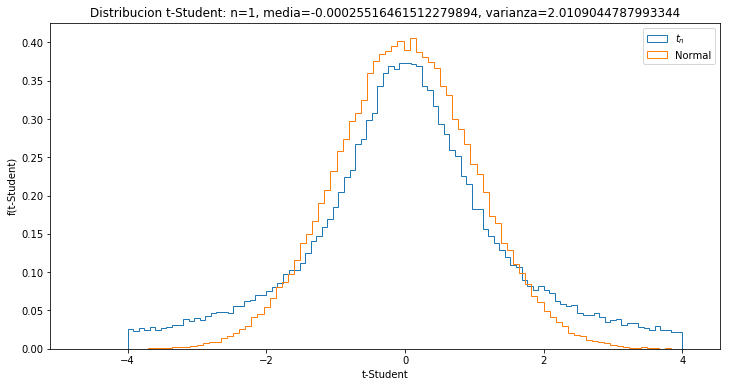

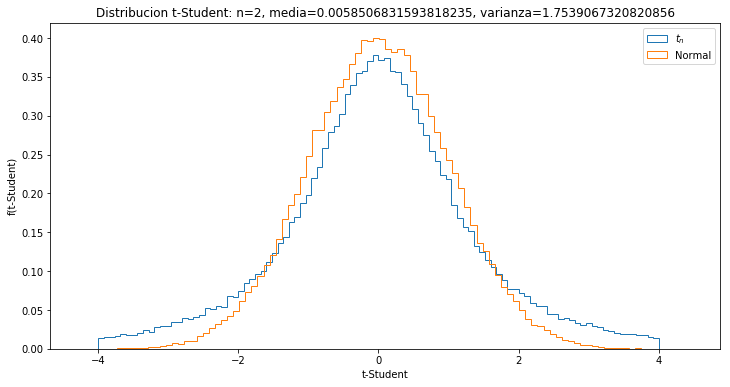

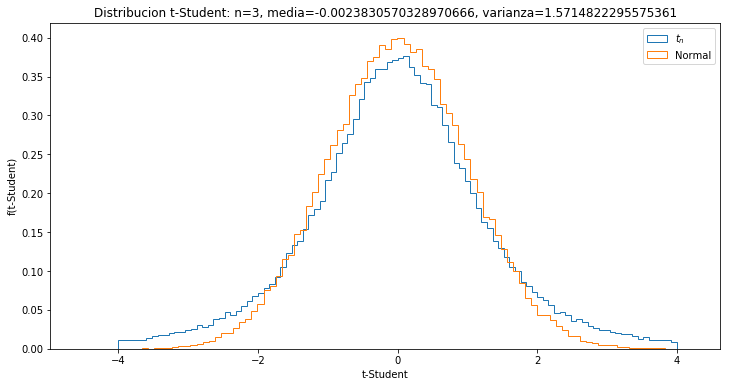

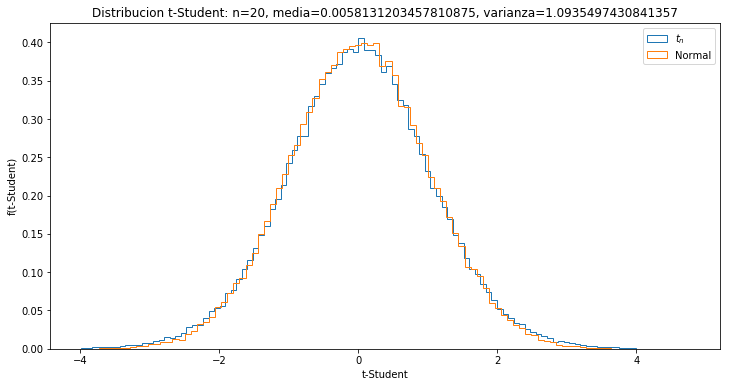

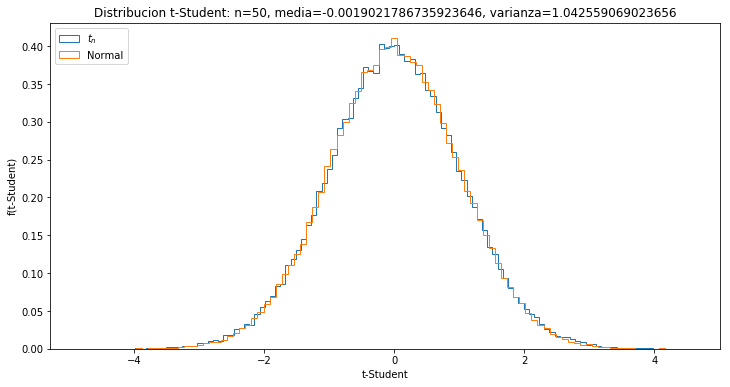

In [19]:
for n in [1,2,3,20,50]:
    plot_tstudent(n)

Nos damos cuenta de que según aumenta el número de grados de libertad la t de Student se aproxima a una normal atendiendo al teorema central del límite. Asimismo vemos como la media y la varianza se aproximan cada vez más a 0 y a 1 respectivamente.

## Tu turno 2: Demostrar gráficamente como la identificación del modelo de Poisson se realiza de una manera más correcta cuando se cambian los parámetros de la muestra. Ayúdate para demostrar esto del ajuste de una regresión lineal, para obtener la pendiente, ordenada el origen y así la calidad del ajuste.

<h5>Resolución:</h5>

Dada una distribución de datos x, puede demostrarse que si ésta sigue una distribución de Poisson entonces la representación gráfica de ln(f_ob(x)) + ln(x!) con respecto a x debe ajustar a una recta con pendiente ln($\lambda$) y ordenada en el origen (ln(n) - $\lambda$). Vamos por tanto a generar una distribución de números aleatorios que siga una Poisson y a realizar dicho ajuste:

In [20]:
# Importamos librerías necesarias

from scipy.special import factorial
import scipy.misc
from pandas import DataFrame
from math import log
np.random.seed(1111111) # para poder replicar los resultados

'''
Función que plotea el histograma de la distribución de Poisson y su ajuste lineal, además de un dataframe con
los valores aportados y calculados.

Input: n_muestras, parámetro lambda
Output: none (plot)
'''

def plot_and_fit_poisson(muestras=30, Lambda=1):

    plt.figure(figsize=(15, 6))

    precision = 0.001
    x_p = np.random.poisson(Lambda,size=(muestras, 1)) # datos distribuidos según una Poisson

    # Cálculo de las frecuencias a través de un histograma de tamaño de bin igual al dato
    min, max=np.amin(x_p), np.amax(x_p)
    bins=(max-min)+1

    plt.subplot(1, 2, 1);
    neventos = plt.hist(x_p, bins)[0]
    plt.title('Poisson $\lambda$= {0}'.format(Lambda), size=14)
    plt.xlabel('$P(x;\lambda)$', size=14)
    plt.ylabel('# eventos', size=14)

    plt.subplot(1, 2, 2);
    f_ob=neventos
    X= np.linspace(min, max, bins)
    Y_x=np.log(f_ob+precision)+np.log(scipy.special.factorial(X))
    _=plt.plot(X, Y_x, 'o')

    # Recta de ajuste lineal
    a, b = np.polyfit(X, Y_x, 1)
    ## Calidad del ajuste
    pendiente = np.log(Lambda)
    ord_origen = np.log(muestras)-Lambda

    plt.title('Regresión lineal para ajuste sobre Poisson', size=14)

    _=plt.plot(X, a * X + b)

    plt.show()

    valores = {'Nº de muestras (n)': [muestras], '$\lambda$': [Lambda], 
               'Pendiente calculada': [a], 'ln($\lambda$)': [log(Lambda)], 
               'Ordenada en el origen': [b], 'ln(n) - $\lambda$': [log(Lambda) - Lambda]}
    data = DataFrame(valores, columns= ['Nº de muestras (n)', '$\lambda$', 'Pendiente calculada', 'ln($\lambda$)',  \
                     'Ordenada en el origen', 'ln(n) - $\lambda$'], index=['Valores'])
    display(data)

- Para 30 muestras con $\lambda$ igual a 1:

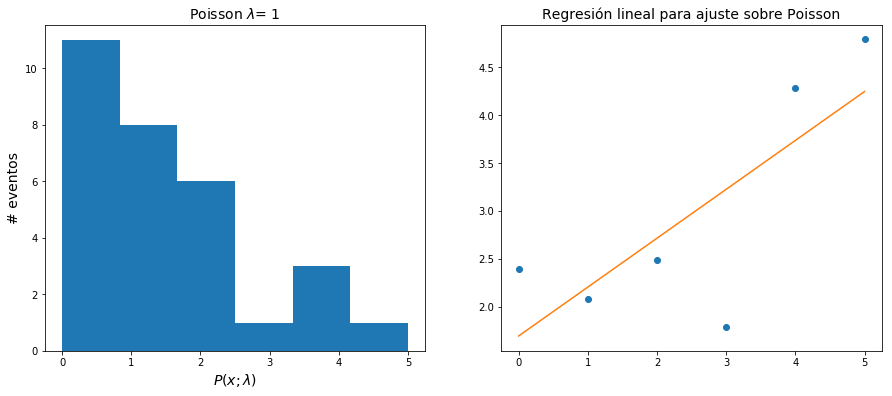

,Nº de muestras (n),$\lambda$,Pendiente calculada,ln($\lambda$),Ordenada en el origen,ln(n) - $\lambda$
Valores,30,1,0.510072,0.0,1.694967,-1.0


In [21]:
plot_and_fit_poisson(muestras=30, Lambda=1)

- Para 200 muestras con $\lambda$ igual a 10:

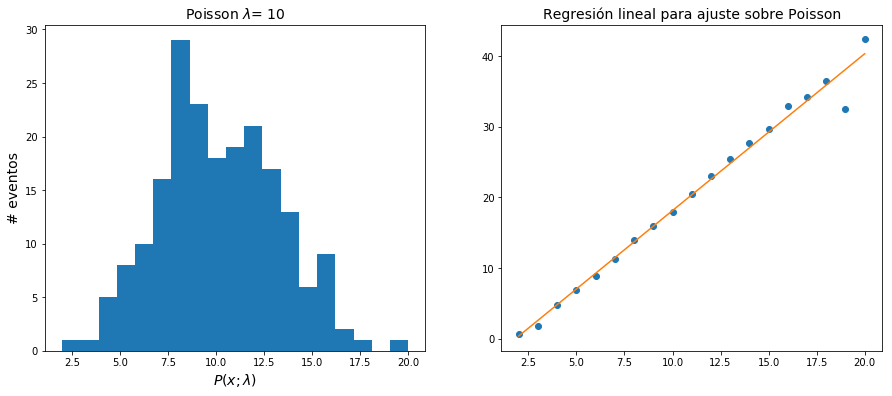

,Nº de muestras (n),$\lambda$,Pendiente calculada,ln($\lambda$),Ordenada en el origen,ln(n) - $\lambda$
Valores,200,10,2.217446,2.302585,-4.035586,-7.697415


In [22]:
plot_and_fit_poisson(muestras=200, Lambda=10)

- Para 300 muestras con $\lambda$ igual a 30:

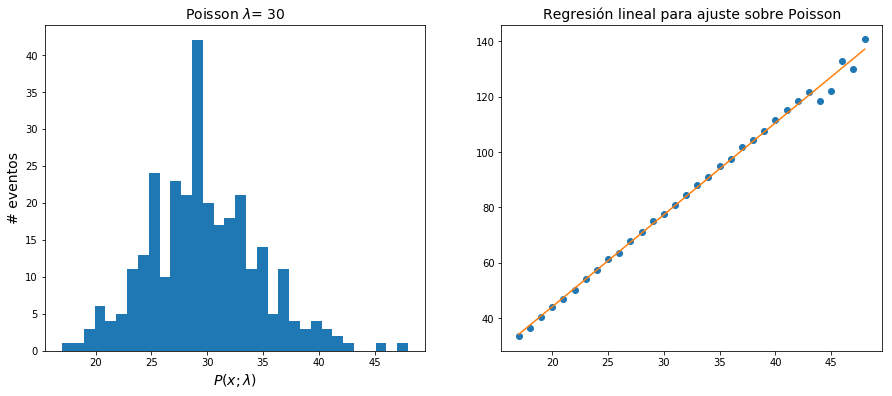

,Nº de muestras (n),$\lambda$,Pendiente calculada,ln($\lambda$),Ordenada en el origen,ln(n) - $\lambda$
Valores,300,30,3.322473,3.401197,-22.353738,-26.598803


In [23]:
plot_and_fit_poisson(muestras=300, Lambda=30)

Es decir, vemos que a medida que aumenta el número de muestras los parámetros del ajuste convergen hacia los valores con que se ha construido la distribución, si bien depende de una cierta relación óptima entre el número de muestras y lambda. En cualquier caso es claro que hay que modificar el valor de los parámetros para obtener un mejor ajuste.

## Tu turno 3: Calcular los parámetros de la distribución muestral de las medias para una variable aleatoria binomial, explorando los límites de convergencia de los parámetros. 

<h5>Resolución:</h5>

Generamos una distribución binomial con Numpy sobre la que calculamos distribución muestral de la media, calculando sobre la misma su media y su varianza:

In [24]:
from scipy import stats
'''
Función que plotea la distribución muestral de las medias para una variable aleatoria binomial en función de
los parámetros número de muestras y p.

Input: nº de muestras, p
Output: none (plot)
'''

def plot_binomial_mean_distrib(tamano_muestra):
    np.random.seed(1111111) # para poder replicar los resultados
    
    plt.figure(figsize=(8, 5))

    n, p = 100, 0.6
    bins=10 
    muestras=150 # muestras
    x_b = np.random.binomial(n,p, size=(tamano_muestra, muestras)) # datos distribuidos según una binomial

    # con la media de cada columna, se calcula la media de cada muestra, 
    # para hacer el histograma de la distribución muestral de la media
    xb_k=x_b.mean(axis=0)

    plt.title('DMM para una Distribución binomial \n \
               n = %.2f, p = %g, \n \
               $E[\overline{xb_k}]$ = %g     \n  \
               pq/n = %g \n \
               $Var[\overline{xb_k}]$ = %g \n \
               Tamaño de la muestra= %d' \
                  %(n, p, xb_k.mean()/n, n*p*(1-p)/tamano_muestra, xb_k.var(), tamano_muestra), size=14)

    plt.xlabel('$\overline{xb_k}$', size=14)
    plt.ylabel('# eventos', size=14)
    _ =  plt.hist(xb_k, bins)
    

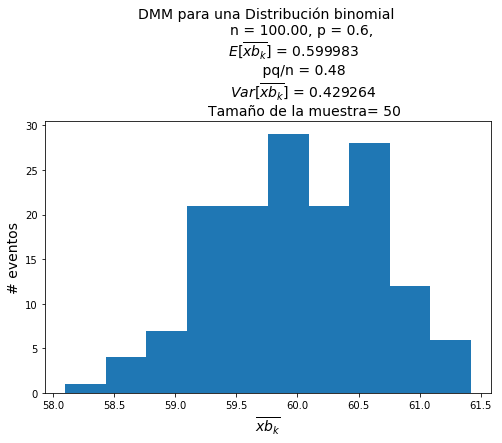

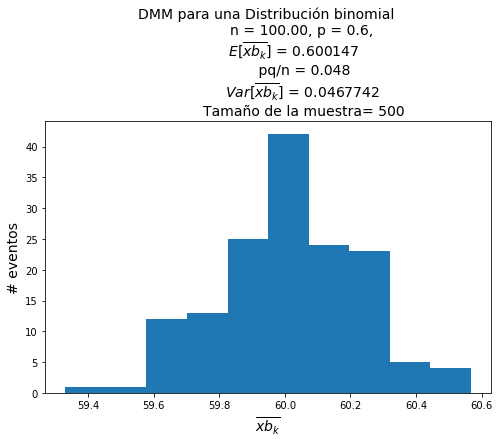

In [25]:
for tamanos in [50,500]:
    plot_binomial_mean_distrib(tamanos)

En las gráficas de arriba se comparan los parámetros de la distribución muestral con los valores de la distribución en sí, a los que aquellos debieran tender al aumentar el tamaño de la muestra. Como es de esperar los parámetros de la distribución muestral de la media tiende a los valores de la distribución en sí al aumentar el tamaño de la muestra, comparando ambos en el título de cad

## Tu turno 4: Calcular y dibujar la función verosimilitud y soporte para el parámetro  $\mu$ de la distribución normal de varianza 1.

Puede demostrarse que la función verosimilitud y la función soporte de la distribución normal para el parçametro $\mu$ vienen dadas, respectivamente, por:
- Función verosimilitud: 
\begin{equation*}
            l(\theta) = k e^ \frac{ {- n (\overline{x} - \mu)^2   }}{2\sigma²}
\end{equation*}

- Función soporte: 
\begin{equation*}
L(\theta) = k -  \frac{ n (\overline{x} - \mu)^2 } {2 \sigma²}
\end{equation*}

donde ambos factores 'k' son constantes, por lo que no se tienen en cuenta en la creación y gráfico de las distribuciones a continuación:

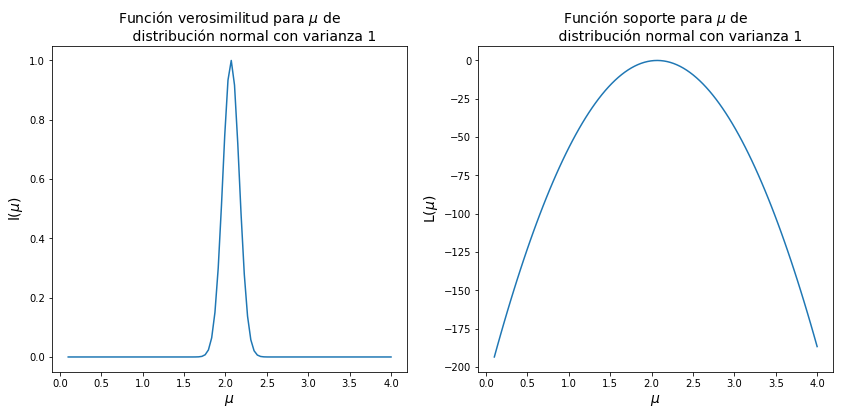

In [44]:
# parámetros de la distribución normal
sigma, muestras = 1, 100

# Valor del parámetro mínimo y máximo
mu_min, mu_max = 0.1, 4
mu = np.linspace(mu_min, mu_max, muestras)

# creando la muestra de datos
normal = np.random.normal(mu, sigma, muestras)

# y el vector de medias
mean = normal.mean()

l_normal = np.exp((-muestras / (2*sigma)) *(mean - mu)**2) # función verosimilitud
L_normal = (-muestras / (2*sigma**2)) * (mean - mu)**2      # función soporte

# Representamos ambas funciones verosimilitud y soporte
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1)

plt.title('Función verosimilitud para $\mu$ de \n \
          distribución normal con varianza 1', size=14)
plt.xlabel('$\mu$', size=14)
plt.ylabel('l($\mu$)', size=14)

plt.plot(mu, l_normal)

plt.subplot(1,2,2)

plt.title('Función soporte para $\mu$ de \n \
          distribución normal con varianza 1', size=14)
plt.xlabel('$\mu$', size=14)
plt.ylabel('L($\mu$)', size=14)

plt.plot(mu, L_normal)

plt.tight_layout

plt.show()